Sources: 

- Robert Haase, Center for Systems Biology Dresden, https://github.com/BiAPoL/Bio-image_Analysis_with_Python

- Bhattiprolu, S. https://www.youtube.com/watch?v=A4po9z61TME&t=1471s

# Images are arrays of numbers

[Numpy](https://numpy.org) is a library for processing multi-dimensional lists of numbers, of which microscopy images (stacks, multi-channel, time-lapses etc.) are a prominent example. We give here an introduction to this library.

See also
* [Image manipulation and processing using Numpy and Scipy by Emmanuelle Gouillart and Gaël Varoquaux](https://scipy-lectures.org/advanced/image_processing/index.html#basic-image)

In [1]:
import numpy as np
from matplotlib.pyplot import imshow

## Numpy arrays

An image is just a two dimensional list of pixels values, in other words a matrix, with a certain number of rows and columns. Therefore we can define it as a list of lists, each list being a row of pixels:

In [2]:
raw_image_array = [
    [1, 0, 2, 1, 0, 0, 0],
    [0, 3, 1, 0, 1, 0, 1],
    [0, 5, 5, 1, 0, 1, 0],
    [0, 6, 6, 5, 1, 0, 2],
    [0, 0, 5, 6, 3, 0, 1],
    [0, 1, 2, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 1, 0]
]
raw_image_array

[[1, 0, 2, 1, 0, 0, 0],
 [0, 3, 1, 0, 1, 0, 1],
 [0, 5, 5, 1, 0, 1, 0],
 [0, 6, 6, 5, 1, 0, 2],
 [0, 0, 5, 6, 3, 0, 1],
 [0, 1, 2, 1, 0, 0, 1],
 [1, 0, 1, 0, 0, 1, 0]]

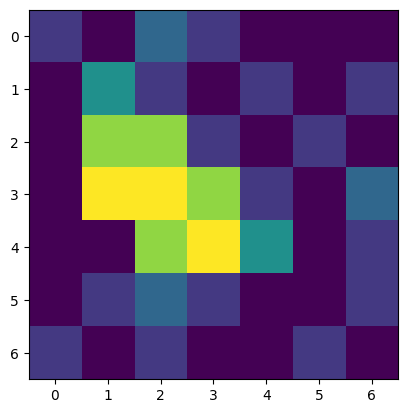

In [3]:
imshow(raw_image_array);

This output is almost the same as above with the difference that now it is indicated that we are dealing with a Numpy ```array```. Such Numpy arrays can now be treated as a one entity and we can perform the computation that we coudn't before:

In [8]:
image = np.asarray(raw_image_array)

In [9]:
image - 2

array([[-1, -2,  0, -1, -2, -2, -2],
       [-2,  1, -1, -2, -1, -2, -1],
       [-2,  3,  3, -1, -2, -1, -2],
       [-2,  4,  4,  3, -1, -2,  0],
       [-2, -2,  3,  4,  1, -2, -1],
       [-2, -1,  0, -1, -2, -2, -1],
       [-1, -2, -1, -2, -2, -1, -2]])

## Two important properties

Arrays like ```image``` have different properties. Two of the most important ones are:
- the ```shape``` of the array, i.e. the number of rows, columns (and channels, planes etc. for multi-dimensional images)
- the ```dtype``` of the array, i.e. an image of type `int64` has 2 to the power of 64 different grey values.

In [10]:
image.shape

(7, 7)

In [11]:
image.dtype

dtype('int64')

In [12]:
image.astype(float)

array([[1., 0., 2., 1., 0., 0., 0.],
       [0., 3., 1., 0., 1., 0., 1.],
       [0., 5., 5., 1., 0., 1., 0.],
       [0., 6., 6., 5., 1., 0., 2.],
       [0., 0., 5., 6., 3., 0., 1.],
       [0., 1., 2., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0.]])

## Other ways of creating arrays

When working with images, we often create artifical images to see what filters do with them. For example, we can create an image where all pixels have value `0` but a single one using the Numpy function [```np.zeros```](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html). It requires to specify and image size.

In [13]:
image_size = (6, 5)

image1 = np.zeros(image_size)
image1

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

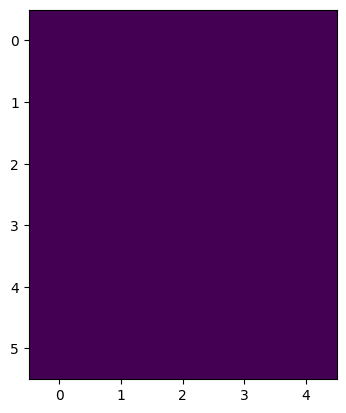

In [14]:
imshow(image1);

As images are just arrays, we just set pixel values as if we were accessing arrays. From this you also learn that the first axis (coordinate 0) is going from top to bottom while the second axis (coordinate 3) goes from left to right.

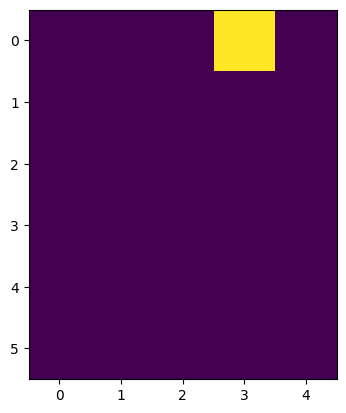

In [15]:
image1[0,3] = 1

imshow(image1);

For studying noise, we can for example create an image with random values using [```np.random.random```](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random).

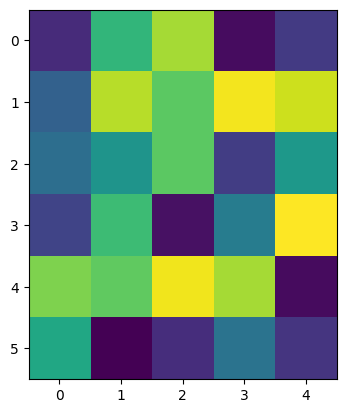

In [16]:
image_random = np.random.random((6, 5))
imshow(image_random);

In [17]:
'''
Many ways but the recommended ways are using skimage or opencv.
We read images to python primarily for processing. 
Processing on multidimensional data is easy with numpy arrays.
skimage and opencv directly store imported images as numpy arrays.

Pillow library is fine but it does not convert to numpy array by default.
Need to convert as a separate step... np.asarray(img)
'''

'\nMany ways but the recommended ways are using skimage or opencv.\nWe read images to python primarily for processing. \nProcessing on multidimensional data is easy with numpy arrays.\nskimage and opencv directly store imported images as numpy arrays.\n\nPillow library is fine but it does not convert to numpy array by default.\nNeed to convert as a separate step... np.asarray(img)\n'

In [22]:
# to install scikit-image, pip install scikit-image 
# to import the package you need to use import skimage

from skimage import io

img = io.imread("m1_images/RGBY.jpg")
print(img.shape)  #x,y,c

#x = Height = 586
#y = Width = 415
#Channels = 3 (RGB)


(586, 415, 3)


In [23]:
#Some image processing tasks in skimage require floating point image
#with values between 0 and 1

from skimage import img_as_float
img2 = img_as_float(img)

import numpy as np
img3 = img.astype(float)
#avoid using astype as it violates assumptions about dtype range.
#for example float should range from 0 to 1 (or -1 to 1) but if you use 
#astype to convert to float, the values do not lie between 0 and 1. 


In [24]:
import numpy as np

arr = np.array([0, 255], dtype=np.uint8)  # An 8-bit integer array
float_arr = arr.astype(np.float32)        # Convert to float
print(float_arr)  


[  0. 255.]


In [25]:
arr = np.array([0, 255], dtype=np.uint8)

# Proper conversion
float_arr = arr / 255.0  # Normalize to range [0, 1]
print(float_arr)  # Output: [0. 1.]


[0. 1.]


In [26]:
from skimage import img_as_float
arr = np.array([0, 255], dtype=np.uint8)
imgarr = img_as_float(arr)
print(imgarr)

[0. 1.]


In [27]:
#Convert back to 8 bit
from skimage import img_as_ubyte
img_8bit = img_as_ubyte(img2)

In [30]:
type(img), img.dtype,img2.dtype, img_8bit.dtype

(numpy.ndarray, dtype('uint8'), dtype('float64'), dtype('uint8'))

In [31]:
img.shape

(586, 415, 3)

In [32]:
img[:10,:10,0]

array([[ 0,  9,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 27, 22, 33, 24, 22, 18, 20, 19, 20],
       [ 0, 30, 30, 35, 21, 20, 14, 15, 17, 18],
       [ 0, 32, 27, 24,  6,  9,  9,  6,  9, 11],
       [ 0, 27, 21, 16,  4, 12, 11,  6,  8, 10],
       [ 0, 19, 14, 14,  3,  9,  3,  0,  2,  3],
       [ 0, 22, 16, 20,  6,  6,  1,  0,  2,  4],
       [ 0, 15, 10, 14,  0,  0,  0,  2,  1,  3],
       [ 0, 20, 16, 15,  0,  4,  2,  0,  3,  4],
       [ 0, 21, 17, 17,  2,  5,  4,  2,  4,  6]], dtype=uint8)

In [33]:
type(img2), img2.dtype

(numpy.ndarray, dtype('float64'))

In [34]:
9/255

0.03529411764705882

In [35]:
img2[:10,:10,0]

array([[0.        , 0.03529412, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01568627, 0.10588235, 0.08627451, 0.12941176, 0.09411765,
        0.08627451, 0.07058824, 0.07843137, 0.0745098 , 0.07843137],
       [0.        , 0.11764706, 0.11764706, 0.1372549 , 0.08235294,
        0.07843137, 0.05490196, 0.05882353, 0.06666667, 0.07058824],
       [0.        , 0.1254902 , 0.10588235, 0.09411765, 0.02352941,
        0.03529412, 0.03529412, 0.02352941, 0.03529412, 0.04313725],
       [0.        , 0.10588235, 0.08235294, 0.0627451 , 0.01568627,
        0.04705882, 0.04313725, 0.02352941, 0.03137255, 0.03921569],
       [0.        , 0.0745098 , 0.05490196, 0.05490196, 0.01176471,
        0.03529412, 0.01176471, 0.        , 0.00784314, 0.01176471],
       [0.        , 0.08627451, 0.0627451 , 0.07843137, 0.02352941,
        0.02352941, 0.00392157, 0.        , 0.00784314, 0.01568627],
       [0.        , 0.05882353, 0.0392156

In [36]:
type(img3), img3.dtype

(numpy.ndarray, dtype('float64'))

In [37]:
img3[:10,:10,0]

array([[ 0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4., 27., 22., 33., 24., 22., 18., 20., 19., 20.],
       [ 0., 30., 30., 35., 21., 20., 14., 15., 17., 18.],
       [ 0., 32., 27., 24.,  6.,  9.,  9.,  6.,  9., 11.],
       [ 0., 27., 21., 16.,  4., 12., 11.,  6.,  8., 10.],
       [ 0., 19., 14., 14.,  3.,  9.,  3.,  0.,  2.,  3.],
       [ 0., 22., 16., 20.,  6.,  6.,  1.,  0.,  2.,  4.],
       [ 0., 15., 10., 14.,  0.,  0.,  0.,  2.,  1.,  3.],
       [ 0., 20., 16., 15.,  0.,  4.,  2.,  0.,  3.,  4.],
       [ 0., 21., 17., 17.,  2.,  5.,  4.,  2.,  4.,  6.]])

In [38]:
type(img_8bit), img_8bit.dtype

(numpy.ndarray, dtype('uint8'))

In [39]:
img_8bit[:10,:10,0]

array([[ 0,  9,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 27, 22, 33, 24, 22, 18, 20, 19, 20],
       [ 0, 30, 30, 35, 21, 20, 14, 15, 17, 18],
       [ 0, 32, 27, 24,  6,  9,  9,  6,  9, 11],
       [ 0, 27, 21, 16,  4, 12, 11,  6,  8, 10],
       [ 0, 19, 14, 14,  3,  9,  3,  0,  2,  3],
       [ 0, 22, 16, 20,  6,  6,  1,  0,  2,  4],
       [ 0, 15, 10, 14,  0,  0,  0,  2,  1,  3],
       [ 0, 20, 16, 15,  0,  4,  2,  0,  3,  4],
       [ 0, 21, 17, 17,  2,  5,  4,  2,  4,  6]], dtype=uint8)

In [40]:
# let us save the image:
io.imsave("m1_images/saved_img.jpg", img)

In [ ]:
######### Using openCV #########

#to install open CV : pip install opencv-python
#to import the package you need to use import cv2

#openCV is a library of programming functions mainly aimed at computer vision.
#Very good for images and videos, especially real time videos.
#It is used extensively for facial recognition, object recognition, motion tracking,
#optical character recognition, segmentation, and even for artificial neural netwroks. 

#Useful preprocessing steps for image processing, for example segmentation. 
#1. SPlit & Merge channels
#2. Scaling / resizing
#3. Denoising / smoothing
#4. Edge detection
#5. Enhancing images. using histogram equalization

###################################
#Pixel values, split and merge channels, 

#Installing the required libraries
#pip install opencv-python
#pip install numpy
#pip install matplotlib

# Save the image
#cv2.imwrite('path_to_output.jpg', image)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
grey_img = cv2.imread("m1_images/RGBY.jpg", 0) 
img = cv2.imread("m1_images/RGBY.jpg", 1)   #Color is BGR not RGB

print(img.shape)     #(586, 415, 3)
print("Top left", img[0,0])    #Top left pixel
print("Top right", img[0, 400])  # Top right
print("Bottom Left", img[580, 0]) # Bottom left
print("Bottom right", img[580, 400])  # Bottom right

(586, 415, 3)
Top left [38  3  0]
Top right [ 0 20 21]
Bottom Left [ 0 55  0]
Bottom right [ 16   6 250]


In [6]:
img.dtype, type(img)

(dtype('uint8'), numpy.ndarray)

In [7]:
img.shape

(586, 415, 3)

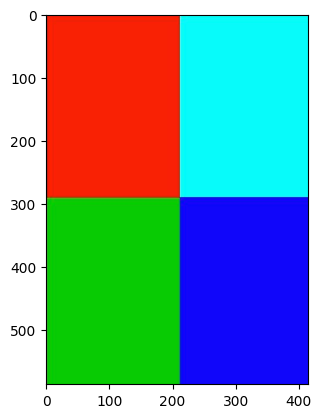

In [8]:
#imshow is workin based on rgb
plt.imshow(img);

In [9]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Top left", img_rgb[0,0])    #Top left pixel
print("Top right", img_rgb[0, 400])  # Top right
print("Bottom Left", img_rgb[580, 0]) # Bottom left
print("Bottom right", img_rgb[580, 400])  # Bottom right

Top left [ 0  3 38]
Top right [21 20  0]
Bottom Left [ 0 55  0]
Bottom right [250   6  16]


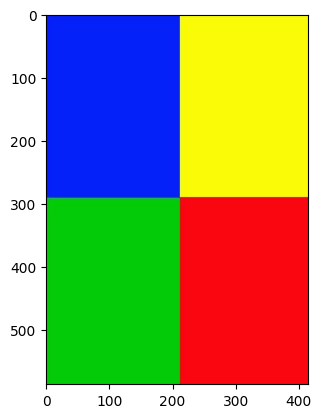

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

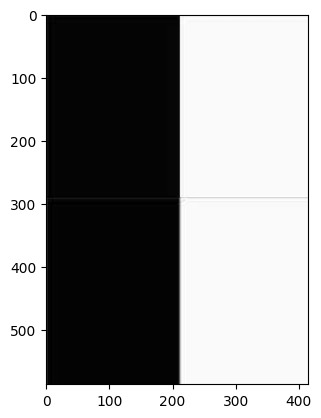

In [11]:
#Split and merging channels
#Show individual color channels in the image
blue = img[:, :, 0]   #Show only blue pic. (BGR so B=0)
green = img[:, :, 1]  #Show only green pixels
red = img[:, :, 2]  #red only

# Converting BGR color to RGB color format
RGB_red = cv2.cvtColor(red, cv2.COLOR_BGR2RGB)

#Displaying image using plt.imshow() method
plt.imshow(RGB_red);


#cv2.imshow("red pic", red)
#cv2.waitKey(0); 
#cv2.destroyAllWindows(); 
#cv2.waitKey(1)



In [12]:
red

array([[  0,   7,   0, ...,  21,  21,  21],
       [  4,  27,  22, ..., 237, 235, 237],
       [  0,  30,  30, ..., 239, 237, 239],
       ...,
       [  0,  56,  27, ..., 250, 250, 250],
       [  0,  56,  27, ..., 250, 250, 250],
       [  0,  56,  27, ..., 250, 250, 250]], dtype=uint8)

In [13]:
cv2.imshow("red pic", red)
cv2.waitKey(0); 
cv2.destroyAllWindows(); 
cv2.waitKey(1)

-1

In [14]:
#Or split all channels at once

b,g,r = cv2.split(img)

cv2.imshow("green pic", g)
cv2.waitKey(0)          

#to merge each image into bgr

img_merged = cv2.merge((b,g,r))

cv2.imshow("merged pic", img_merged)
cv2.waitKey(0)          
cv2.destroyAllWindows() 
cv2.waitKey(1)

-1

In [15]:
b.shape

(586, 415)

In [16]:
g.shape, r.shape, b.shape

((586, 415), (586, 415), (586, 415))

In [17]:
r.dtype

dtype('uint8')

In [18]:
np.zeros(r.shape).dtype

dtype('float64')

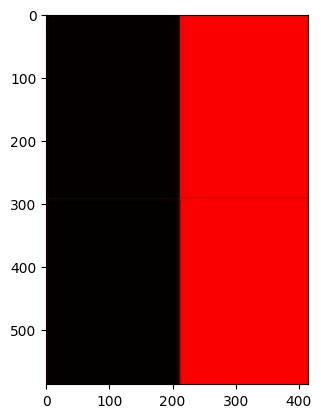

In [19]:
g_s = np.zeros(r.shape).astype(r.dtype)
b_s = np.zeros(r.shape).astype(r.dtype)
img_merged2 = cv2.merge((b_s,g_s,r))
# Converting BGR color to RGB color format
RGB_red2 = cv2.cvtColor(img_merged2, cv2.COLOR_BGR2RGB)

#Displaying image using plt.imshow() method
plt.imshow(RGB_red2);

In [20]:
cv2.imwrite("m1_images/saved_img_opencv3.jpg",img )

True

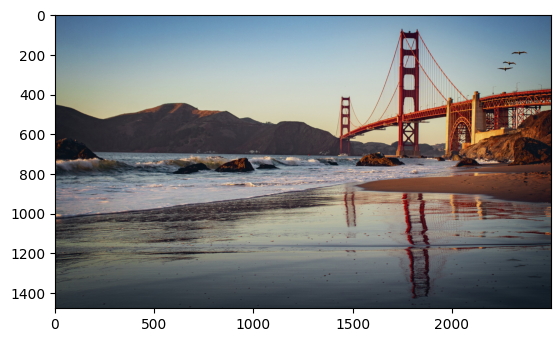

In [28]:
######################
#Basic image operations
# Scaling, 
#https://docs.opencv.org/3.3.1/da/d6e/tutorial_py_geometric_transformations.html

import cv2

img = cv2.imread("m1_images/SF_GG.jpg", 1)   #Color is BGR not RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

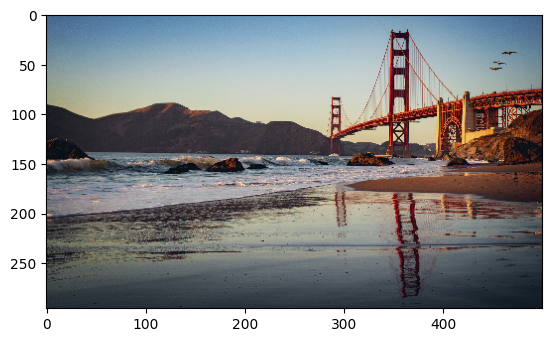

In [29]:
img = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)
#The second parameter in cv2.resize() specifies the output image size as a tuple (width, height).
#By providing None, you are telling OpenCV that the size will instead be determined by the scaling factors fx and fy.
#fx=0.2 means the width will be scaled to 20% of the original size.
#fy=0.2 means the height will be scaled to 20% of the original size.
#Interpolation Method: This specifies how the pixel values are calculated 
#during resizing, especially when scaling up or down.
#Following xample zooms by 2 times.
cv2.imwrite("m1_images/SF_GG2.jpg",img )
resized = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))


In [40]:
###########################
#Reading images
from PIL import Image 
  
img = Image.open("m1_images/test_image.jpg") #Not a numpy array
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [41]:
# show Images on external default viewer. This can be paint or photo viewer on Windows
img.show() 

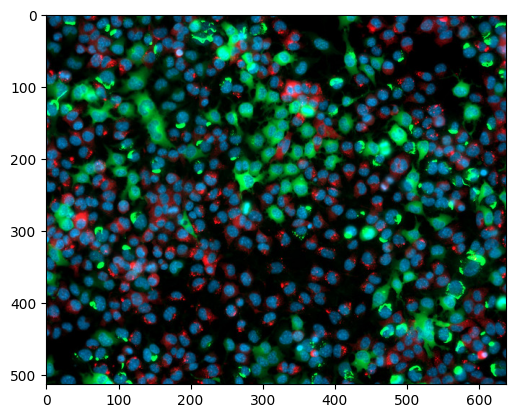

In [36]:
plt.imshow(img);

JPEG
RGB
(639, 513)


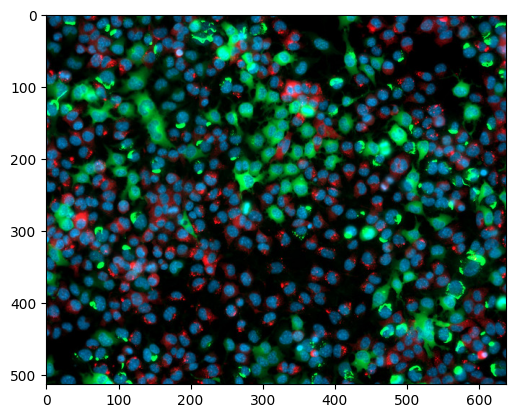

In [42]:
# prints format of image 
print(img.format) 
  
# prints mode of image RGB or CMYK
print(img.mode) 

print(img.size)  #prints the size of image (width, height)

img_array = np.array(img)
plt.imshow(img_array);

In [45]:
print(img.size)
# Resize images
small_img_a = np.array(img.resize((200, 300)))
print(small_img_a.shape)

img.thumbnail((400,400))

#thumbnail Maintains Aspect Ratio:
#thumbnail Modifies the Image In-Place:
img.size
img.show()

(639, 513)
(300, 200, 3)


In [44]:
#When resizing an image using Pillow’s resize((width, height)) method, 
#the size is specified as (width, height) in (columns, rows) format, which corresponds to (x, y).
#The new dimensions you specified are (200, 300), meaning the resized image
#is 200 pixels wide and 300 pixels tall.

#When you convert the resized Pillow image to a NumPy array using np.array(),
#NumPy represents the image in the shape (height, width, channels), where:
#height: Number of rows (vertical pixels).
#width: Number of columns (horizontal pixels).
#channels: Number of color channels (e.g., 3 f

In [46]:
# Resize images
small_img = img.resize((200, 300))
small_img.save("m1_images/test_image_small.jpg")  #squished image
small_img.show()

# resize() method resizes images to exact value whether it makes sense or not.
#aspect ratio is not maintained so images are squished.
#if you want to keep the aspect ration then use thumbnai() method

#Image.thumbnail resizes to the largest size that
#(a) preserves the aspect ratio, (b) does not exceed the original image,
#and (c) does not exceed the size specified in the arguments of thumbnail.
#Furthermore, calling thumbnail resizes it in place, whereas resize returns the resized image.

img.thumbnail((200, 200))
img.save("m1_images/test_image_small_new.jpg")
img.show()

print(img.size)

img.thumbnail((1200, 1200))  #doesn't blow up the image, only reduces the size if original is larger.
img.save("m1_images/test_image_small_new1.jpg") 
img.show()

large_img = img.resize((1200, 1300))
large_img.save("m1_images/test_image_large.jpg")  #enlarged image. 
print(large_img.size)
large_img.show()


(200, 161)
(1200, 1300)


In [47]:
#Cropping images
from PIL import Image 
img = Image.open("m1_images/test_image.jpg")
img.show()
cropped_img = img.crop((0, 0, 300, 300))  #crops from (0,0) to (300,300)
cropped_img.save("m1_images/cropped_img.jpg")
cropped_img.show()
  


In [48]:
# We can paste image on another image
#this involves copying original image and pasting a second image on it
from PIL import Image 
img1 = Image.open("m1_images/test_image.jpg")
print(img1.size)
img2 = Image.open("m1_images/SF_GG2.jpg")
print(img2.size)
img2.thumbnail((200, 200))  #Resize in case the image is very large. 

img1_copy = img1.copy()   #Create a copy of the large image
img1_copy.paste(img2, (50, 50))  #Paset the smaller imager image at specified location
img1_copy.save("m1_images/pasted_image.jpg")
img1_copy.show()


(639, 513)
(500, 296)


In [49]:
# Rotating images
from PIL import Image 
img = Image.open("m1_images/test_image.jpg")
img.show()

img_90_rot = img.rotate(90)
img_90_rot.save("m1_images/rotated90.jpg")  #keeps original aspect ratio and dimensions
img_90_rot.show()


img_45_rot = img.rotate(45)
img_45_rot.save("m1_images/rotated45.jpg")  #keeps original aspect ratio and dimensions
img_45_rot.show()

img_45_rot = img.rotate(45, expand=True)  #Dimensions are expanded to fit the entire image
img_45_rot.save("m1_images/rotated45.jpg")  
img_45_rot.show()



In [52]:
#Flipping or transposing images

from PIL import Image 
img = Image.open("m1_images/SF_GG.jpg")  #easy to see that the image is flipped

img_flipLR = img.transpose(Image.FLIP_LEFT_RIGHT)
img_flipLR.save("m1_images/flippedLR.jpg")
img_flipLR.show()

img_flipTB = img.transpose(Image.FLIP_TOP_BOTTOM)
img_flipTB.save("m1_images/flippedTB.jpg")
img_flipTB.show()


In [56]:
#Here is a way to automate image processing for multiple images.

from PIL import Image 
import glob #used to retrieve files or directories based on a specified pattern 

path = "m1_images/test_images/aeroplane/*.*"
glob.glob(path)

['m1_images/test_images/aeroplane/4.jpg',
 'm1_images/test_images/aeroplane/2.jpg',
 'm1_images/test_images/aeroplane/3.jpg',
 'm1_images/test_images/aeroplane/1.jpg']

In [ ]:
for file in glob.glob(path): #glob.glob(path): Returns a list of file paths matching the pattern defined in path
    print(file)     #just stop here to see all file names printed
    a= Image.open(file)  #now, we can read each file since we have the full path
    
    rotated45 = a.rotate(45, expand=True)
    rotated45.save(file+"_rotated45.png", "PNG") 